In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv("./Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [58]:
df.describe()                   #summary of data

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [59]:
df.columns = df.columns.str.capitalize()        #capitalize all column names for simplicity
df.head()

,Timestamp,Gender,Country,Occupation,Self_employed,Family_history,Treatment,Days_indoors,Growing_stress,Changes_habits,Mental_health_history,Mood_swings,Coping_struggles,Work_interest,Social_weakness,Mental_health_interview,Care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [60]:
print(f'Before dropping duplicates shape of dataframe is : {df.shape}')
dd = df.drop_duplicates()
print(f'After dropping duplicates shape of dataframe is : {df.shape}')

Before dropping duplicates shape of dataframe is : (292364, 17)
After dropping duplicates shape of dataframe is : (292364, 17)


In [61]:
df.isna().any()           # Check for missing values

Timestamp                  False
Gender                     False
Country                    False
Occupation                 False
Self_employed               True
Family_history             False
Treatment                  False
Days_indoors               False
Growing_stress             False
Changes_habits             False
Mental_health_history      False
Mood_swings                False
Coping_struggles           False
Work_interest              False
Social_weakness            False
Mental_health_interview    False
Care_options               False
dtype: bool

In [62]:
df['Self_employed'] = df['Self_employed'].fillna("Unknown")         #Dealing with missing values
print(df['Self_employed'].unique())

['Unknown' 'No' 'Yes']


In [63]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])                   #we will mainly work with year from time parameters
df['Year'] = df['Timestamp'].dt.year
df.drop(columns=['Timestamp'], inplace=True)
year_column = df.pop('Year') 
df.insert(0, 'Year', year_column)
df.head()


,Year,Gender,Country,Occupation,Self_employed,Family_history,Treatment,Days_indoors,Growing_stress,Changes_habits,Mental_health_history,Mood_swings,Coping_struggles,Work_interest,Social_weakness,Mental_health_interview,Care_options
0,2014,Female,United States,Corporate,Unknown,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014,Female,United States,Corporate,Unknown,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014,Female,United States,Corporate,Unknown,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [64]:
replacement_dict = {'1-14 days':'Less than 14 days','Go out Every day':'0','15-30 days':'Less than a month','31-60 days':'Less than 2 months'}
df['Days_indoors'] = df['Days_indoors'].replace(replacement_dict)               #replace categories for easy understanding
print(df['Days_indoors'].unique())

['Less than 14 days' '0' 'More than 2 months' 'Less than a month'
 'Less than 2 months']


# Does time spent indoors impacts stress growth?

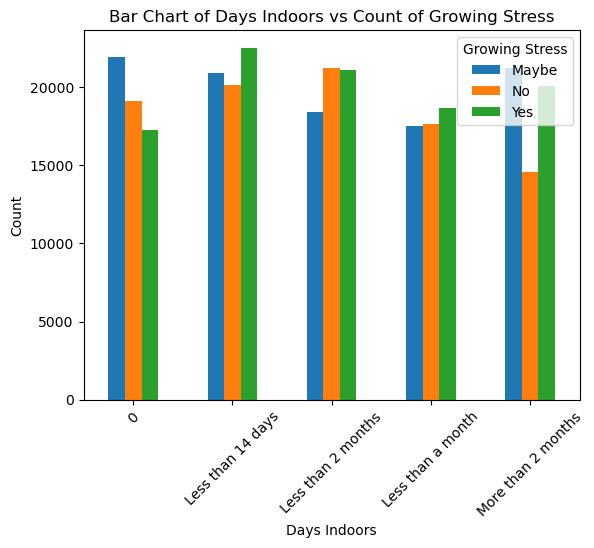

In [65]:
counts = df.groupby(['Days_indoors', 'Growing_stress']).size().unstack()
counts.plot(kind='bar', rot=45)
plt.xlabel('Days Indoors')
plt.ylabel('Count')
plt.title('Bar Chart of Days Indoors vs Count of Growing Stress')
plt.legend(title='Growing Stress')
plt.show()

# Which gender suffers most mood swings?

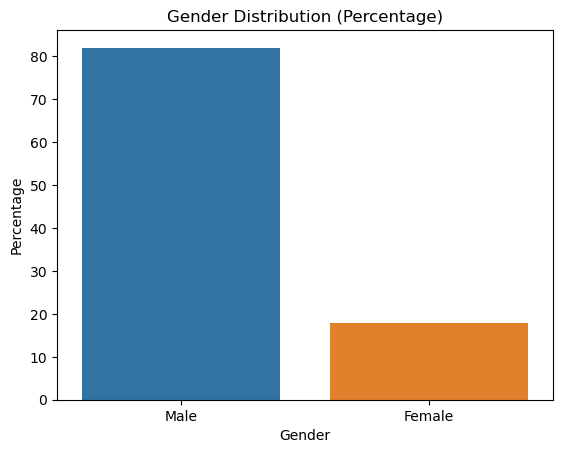

In [66]:
total_count = len(df)
percentage = (df['Gender'].value_counts() / total_count) * 100
fig, ax = plt.subplots()
sns.barplot(x=percentage.index, y=percentage.values, ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel('Percentage')
ax.set_title("Gender Distribution (Percentage)")
plt.show()

<Figure size 1600x1200 with 0 Axes>

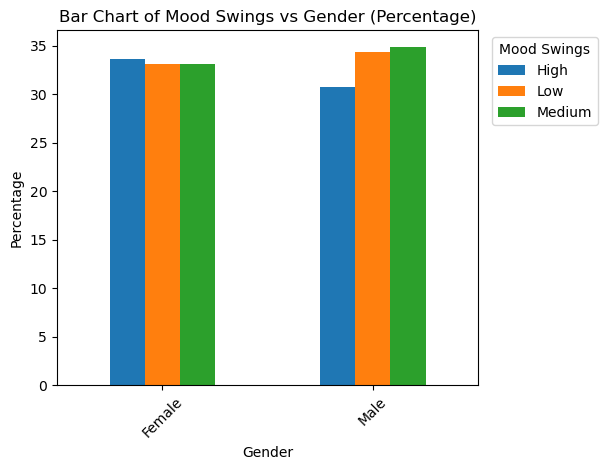

In [67]:
total_counts = df.groupby('Gender')['Mood_swings'].count()
percentage = df.groupby(['Gender','Mood_swings']).size() / total_counts * 100
percentage = percentage.unstack()
plt.figure(figsize=(16,12))
percentage.plot(kind='bar', rot=45)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Bar Chart of Mood Swings vs Gender (Percentage)')
plt.legend(title='Mood Swings',loc="upper right",bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

# Country wise Treatment Distribution for year 2014

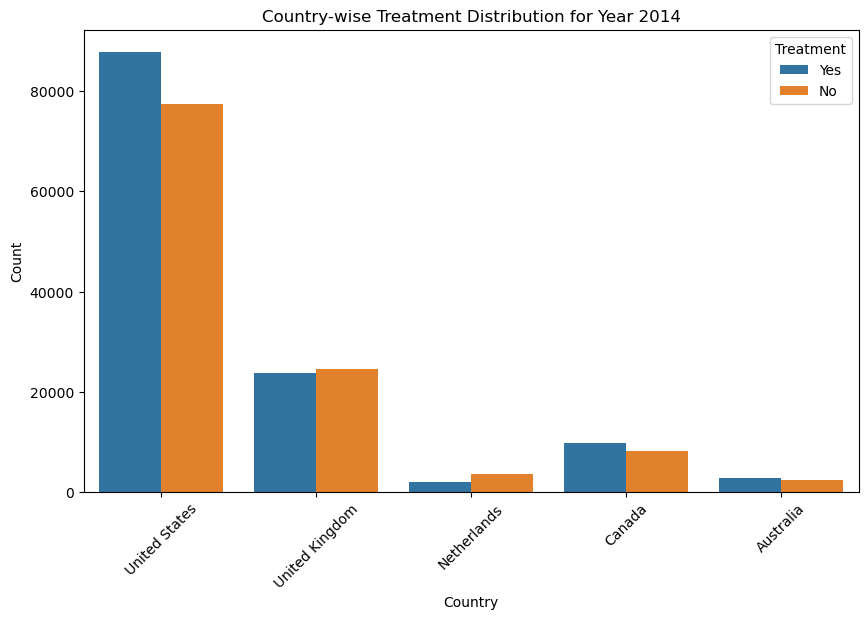

In [68]:
df_2014 = df[df['Year'] == 2014]
country_counts = df_2014['Country'].value_counts()
top_5_countries = country_counts.head(5).index
data_top_5_countries = df_2014[df_2014['Country'].isin(top_5_countries)].sort_values('Country', ascending=False)
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Treatment', data=data_top_5_countries)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country-wise Treatment Distribution for Year 2014')
plt.legend(title='Treatment')
plt.xticks(rotation=45) 
plt.show()

# Occupation wise Treatment Distribution

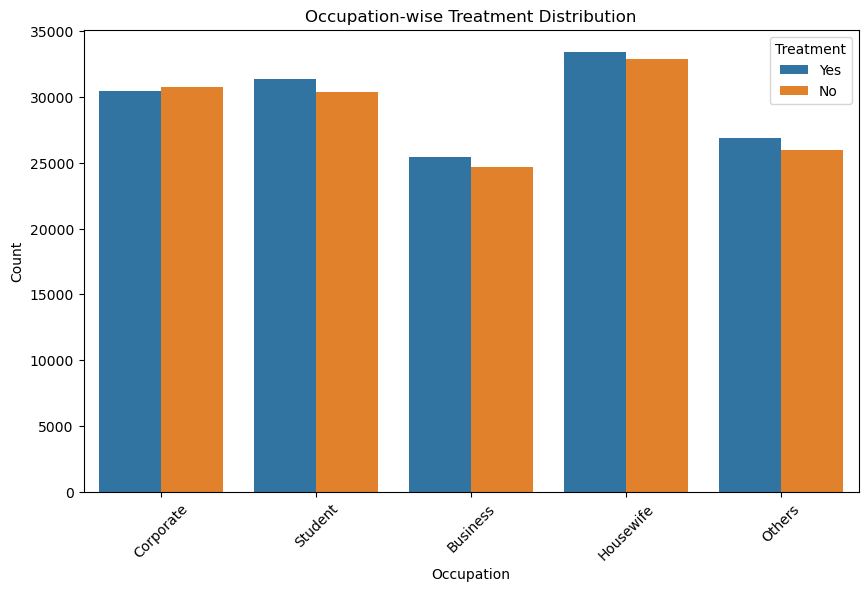

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Treatment', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation-wise Treatment Distribution')
plt.legend(title='Treatment')
plt.xticks(rotation=45) 
plt.show()

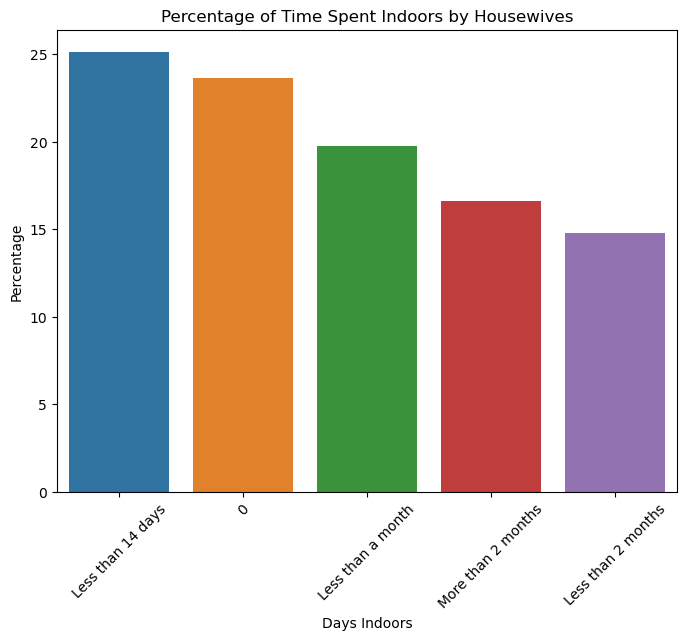

In [74]:
housewives_df = df[df['Occupation'] == 'Housewife']
total_housewives = len(housewives_df)
percentage = (housewives_df['Days_indoors'].value_counts() / total_housewives) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage.index, y=percentage.values)
plt.xlabel('Days Indoors')
plt.ylabel('Percentage')
plt.title('Percentage of Time Spent Indoors by Housewives')
plt.xticks(rotation = 45)
plt.show()